<a href="https://colab.research.google.com/github/sriramlifesize/AIML-ML/blob/master/Feature_Selection_Model_Selection_and_Tuning_sriram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Concrete Strength Prediction

## Objective
To predict the concrete strength using the data available in file concrete_data.xls. Apply
feature engineering and model tuning to obtain 80% to 95% of R2score.

# Resources Available  
The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learningdatabases/concrete/compressive/. The same has been shared along with the course content. 

# Content

Attribute Information:
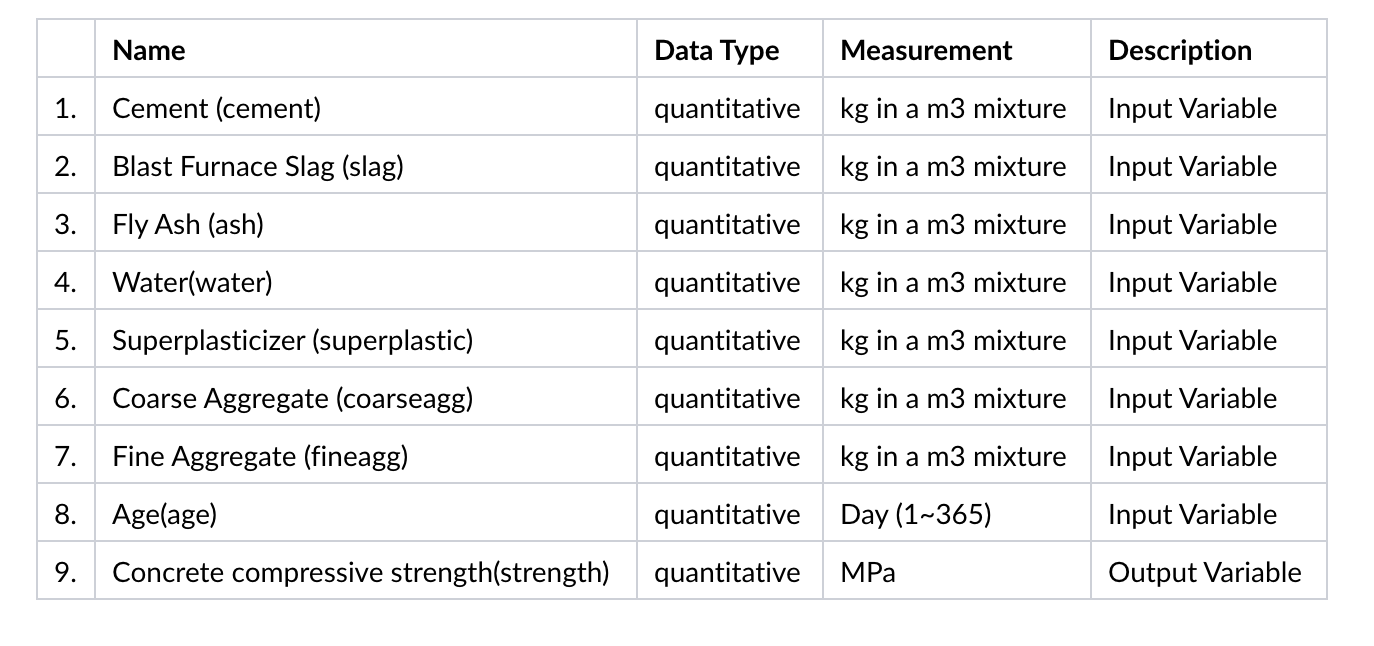

# 1.  Load data & Initial screening

In [2]:
import warnings
import pandas as pd 
import numpy as np
df = pd.read_csv('concrete.csv')
print('Data Size:', df.shape)
df.head()

Data Size: (1030, 9)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
# Null data
df.isnull().count()

cement          1030
slag            1030
ash             1030
water           1030
superplastic    1030
coarseagg       1030
fineagg         1030
age             1030
strength        1030
dtype: int64

In [5]:
# Duplicate data
print("Amount of duplicate data :", df.duplicated().sum())
duplicate_bool = df.duplicated()
df.loc[duplicate_bool == True]

Amount of duplicate data : 25


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [8]:
# Drop duplicates
df = df.drop_duplicates(keep='first')
print(df.shape)

(1005, 9)


In [9]:
# Reset Index
df=df.reset_index(drop=True)
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1000,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1001,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1002,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1003,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1004,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


<p style="color:red"> There are 1,030 rows of data collection. No null values. No duplicates. Age is given by days.</p>

# 2. Exploration data quality (EDA)

In [10]:
# Unique elements
df.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [11]:
# Statistic information
round(df.describe(),3)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1005.000,1005.000,1005.000,1005.000,1005.000,1005.000,1005.000,1005.000,1005.000
mean,278.631,72.043,55.536,182.075,6.033,974.377,772.688,45.857,35.250
std,104.344,86.171,64.208,21.339,5.920,77.580,80.340,63.735,16.285
min,102.000,0.000,0.000,121.800,0.000,801.000,594.000,1.000,2.330
25%,190.700,0.000,0.000,166.600,0.000,932.000,724.300,7.000,23.520
50%,265.000,20.000,0.000,185.700,6.100,968.000,780.000,28.000,33.800
75%,349.000,142.500,118.300,192.900,10.000,1031.000,822.200,56.000,44.870
max,540.000,359.400,200.100,247.000,32.200,1145.000,992.600,365.000,82.600


<p style="color:Blue"> 2.1- Univariate and Bi-variante Analysis</p>

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew: 0.4


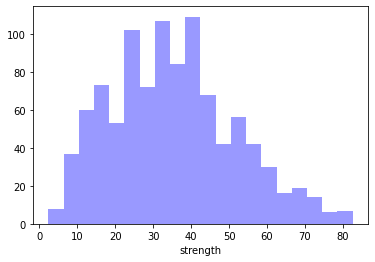

In [14]:
# 1.- Output data analysis
sns.distplot(df.strength, kde=False, bins=20, color='blue');
print("Skew:", round(df.strength.skew(),2));

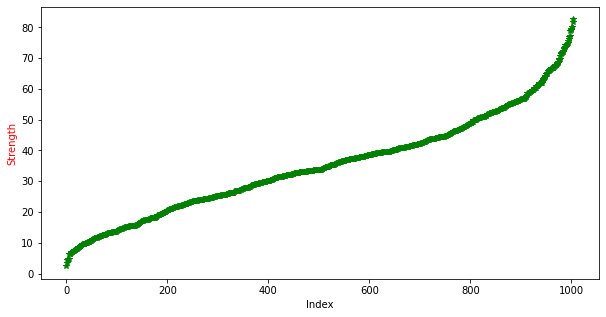

In [21]:
# 1.- Output data analysis
df_st1 = df.sort_values('strength', ascending = True).reset_index(drop=True);
#
x = df_st1.index
y1 = df_st1.strength

fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(x, y1, 'g*')

ax1.set_xlabel('Index')
ax1.set_ylabel('Strength', color='r')

plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


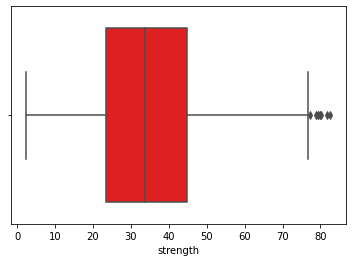

In [22]:
#1- Strength (univariante analysis)
sns.boxplot(df.strength, color="red");

In [23]:
# Outlayers over 77 Outliers = (Q3-Q1)*1.5+Q3
print('Outlayers :',df.strength[df.strength>77].count())

Outlayers : 8


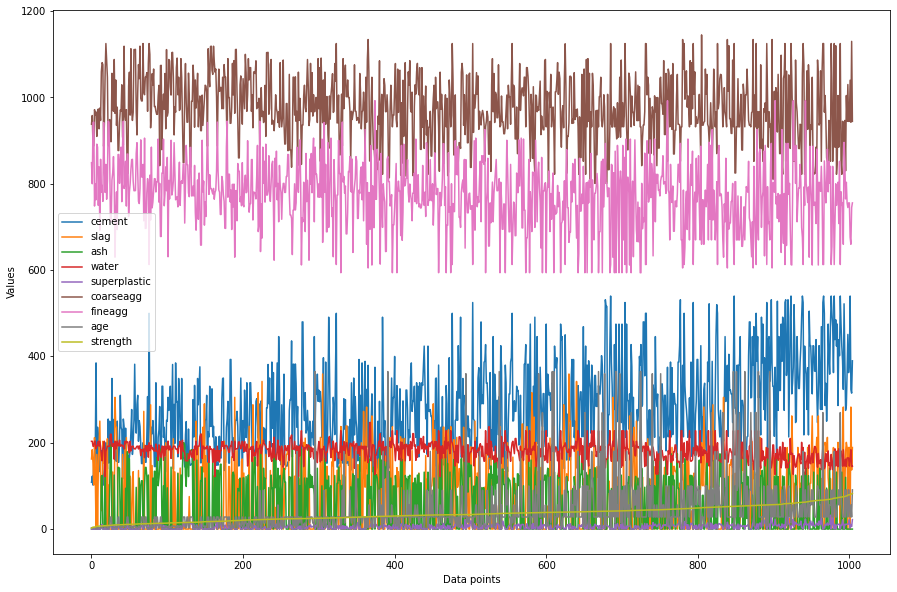

In [24]:
#1 Strength as variable dependent
df_st = df.sort_values('strength', ascending = True).reset_index(drop=True);
df_st.plot(figsize=(15,10));
plt.xlabel("Data points");
plt.ylabel("Values");

In [25]:
# Calculating the percent of material in a m3
list_mat = df.drop(columns=['age','strength'])
list_mat.mean()

cement          278.631343
slag             72.043483
ash              55.536318
water           182.075323
superplastic      6.033234
coarseagg       974.376816
fineagg         772.688259
dtype: float64

In [28]:
# Calculating the percent of material in a m3
list_mat.mean()/(list_mat.mean().sum())*100

cement          11.900280
slag             3.076960
ash              2.371943
water            7.776395
superplastic     0.257678
coarseagg       41.615408
fineagg         33.001336
dtype: float64

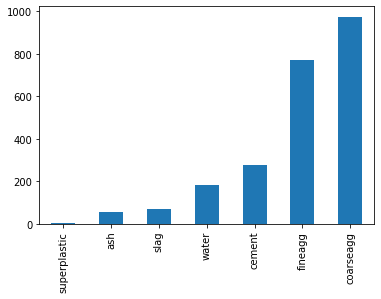

In [27]:
# Calculating the percent of material in the concentration of the mix/m3
list_mat.mean().sort_values().plot(kind='bar');

<p style="color:red"> Obs.: There are 8 data points with strength outlayers over 77. Material with less concentration in the mix is superplastic with 0.26%. Highest concentration in the mix is the coarseaggregation with 41.6% </p>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew: 0.56


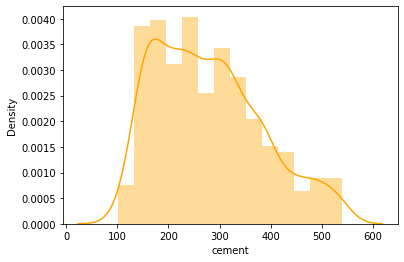

In [34]:
# 2.- Cement (univariante analysis)
sns.distplot(df.cement, kde=True, color='orange');
print("Skew:", round(df.cement.skew(),2));

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


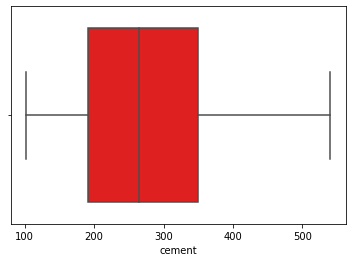

In [35]:
#2.- Cement (univariate analysis)
sns.boxplot(df.cement, color='red');

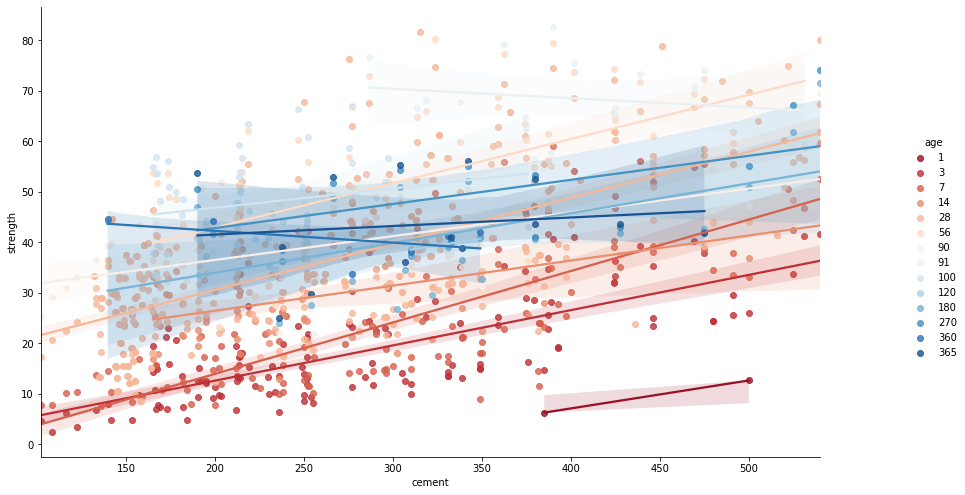

In [36]:
# 2.-Cement (Bi-variante analysis)
sns.lmplot(x='cement', y='strength', data=df, hue='age', palette="RdBu");
fig = plt.gcf()
fig.set_size_inches(14, 7)

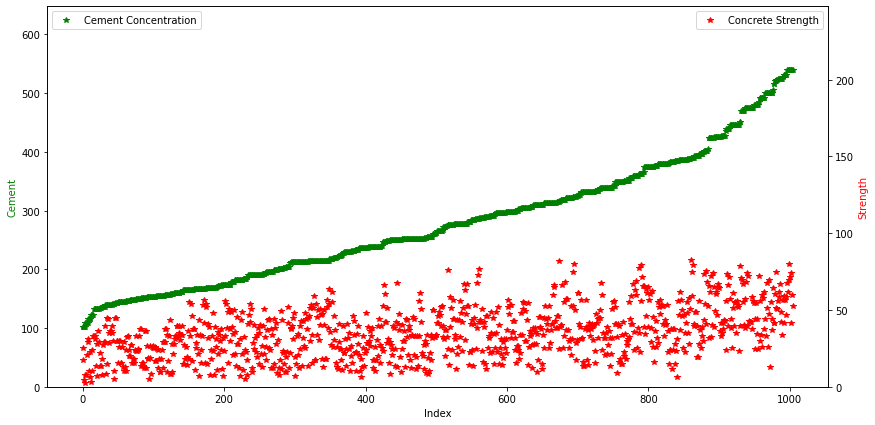

In [37]:
#2 Concrete Strength as variable dependent of cement concentration
df_st2 = df.sort_values('cement', ascending = True).reset_index(drop=True);
#
x = df_st2.index
y1 = df_st2.cement
y2 = df_st2.strength

fig, ax1 = plt.subplots(figsize=(14,7))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'g*',label='Cement Concentration')
ax2.plot(x, y2, 'r*',label='Concrete Strength')


ax1.set_xlabel('Index')
ax1.set_ylabel('Cement', color='g')
ax2.set_ylabel('Strength', color='r')

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

max1 = df.cement.max()*1.2
max2 = df.strength.max()*3
#axes = plt.gca()
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

<p style="color:red"> Obs.: Strength shows an increasing tendency with the cement concentration. No outlayers. Concrete strength converge to aveg. 40 Mpa when increasing the age  </p>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew: 0.86


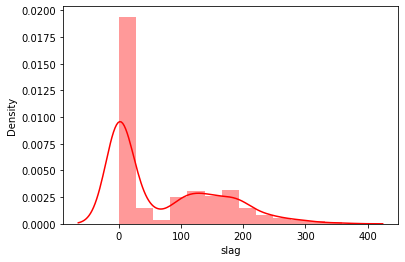

In [39]:
# 3- Blast Furnace Slag (univariante analysis)
sns.distplot(df.slag, kde=True, color='red');
print("Skew:", round(df.slag.skew(),2));

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


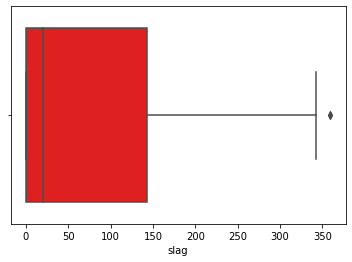

In [41]:
#3.- Slag (univariante analysis)
sns.boxplot(df.slag, color="red");

In [42]:
#3.-Slag
print('Outlayers :',df.slag[df.slag>350].count())

Outlayers : 2


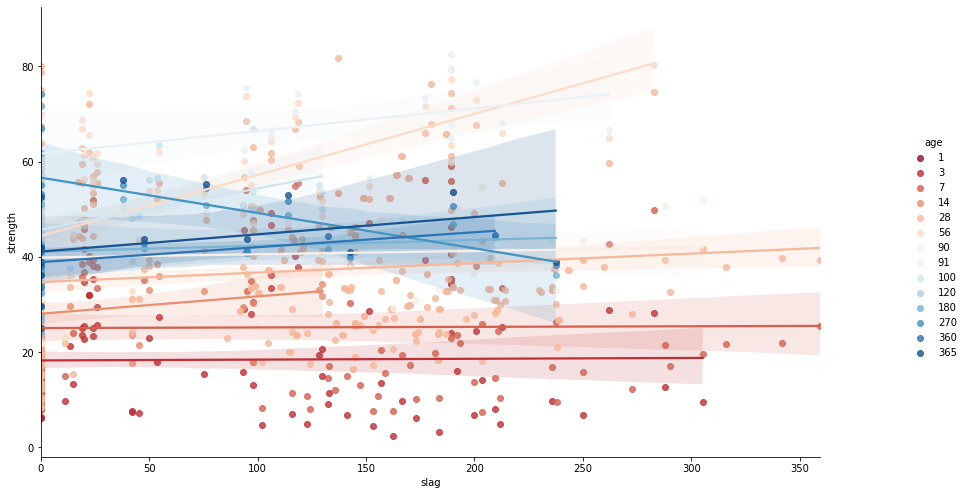

In [43]:
# 3.- Slag (Bi-variante analysis)
sns.lmplot(x='slag', y='strength', data=df, hue='age', palette="RdBu"); #, hue='cyl'
fig = plt.gcf()
fig.set_size_inches(14, 7)

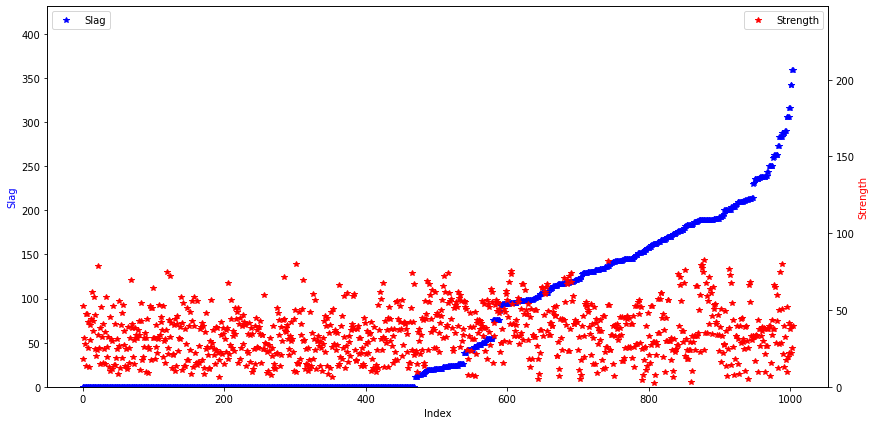

In [44]:
#3 Concrete Strength as variable dependent of Slag concentration
df_st3 = df.sort_values('slag', ascending = True).reset_index(drop=True);
#
x = df_st3.index
y1 = df_st3.slag
y2 = df_st3.strength

fig, ax1 = plt.subplots(figsize=(14,7))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*', label='Slag')
ax2.plot(x, y2, 'r*', label='Strength')


ax1.set_xlabel('Index')
ax1.set_ylabel('Slag', color='b')
ax2.set_ylabel('Strength', color='r')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

max1 = df.slag.max()*1.2
max2 = df.strength.max()*3
#axes = plt.gca()
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

Data points with zero slag in the mix : 470 of 1005 points
Ave. concrete strength with zero fly slag : 31.62
Ave. concrete strength with fly slag : 38.44


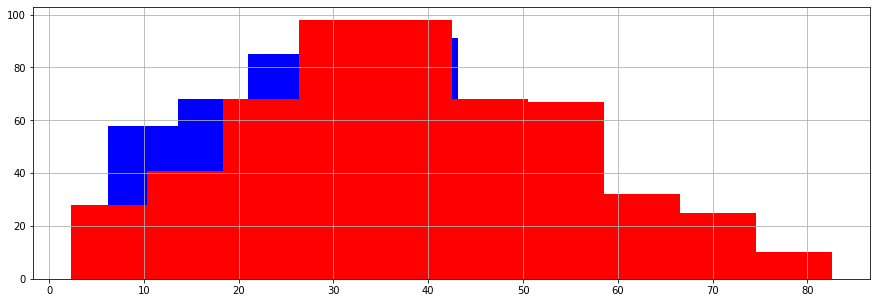

In [46]:
#3.- Concrete strength with & without Slag concentration 
print('Data points with zero slag in the mix :',df.slag[df.slag==0].count(),'of', df.shape[0], 'points')
print('Ave. concrete strength with zero fly slag :', round(df[df.slag==0].strength.mean(),2))
print('Ave. concrete strength with fly slag :', round(df[df.slag>0].strength.mean(),2))
df[df.slag==0].strength.hist(color='blue');
df[df.slag>0].strength.hist(color='red');
fig = plt.gcf();
fig.set_size_inches(15, 5);

In [47]:
# tree drivers with values equal to zero
df[(df.slag==0) & (df.ash==0) & (df.superplastic==0)].count()

cement          208
slag            208
ash             208
water           208
superplastic    208
coarseagg       208
fineagg         208
age             208
strength        208
dtype: int64

In [48]:
# New Data Frame
df_new = df.copy()

In [49]:
#3 replacing th zero values by the median
med_slag = df.slag[df.slag>0].median()
df_new.slag.loc[df_new.slag==0] = med_slag;

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew: 0.32
Mean: 134.71


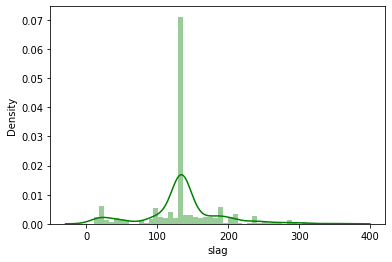

In [51]:
#3 New Plot
sns.distplot(df_new.slag, color='green');
print("Skew:", round(df_new.slag.skew(),2));
print("Mean:", round(df_new.slag.mean(),2));

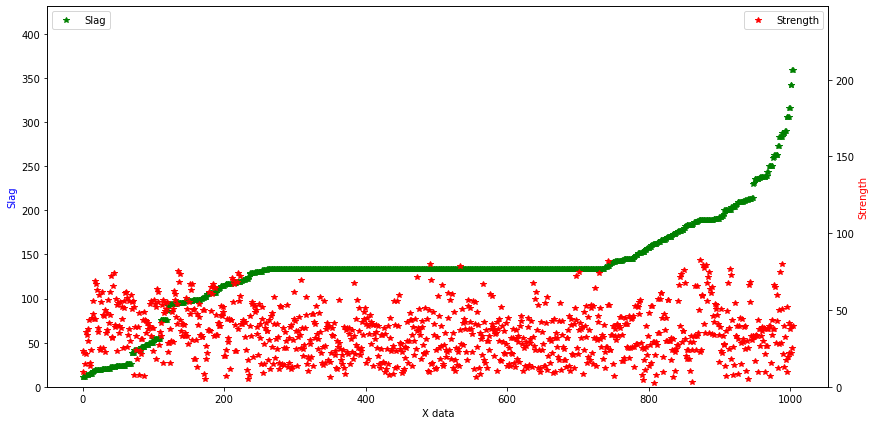

In [54]:
#3 Concrete Strength as variable dependent of Slag concentration
df_st3 = df_new.sort_values('slag', ascending = True).reset_index(drop=True);
#
x = df_st3.index
y1 = df_st3.slag
y2 = df_st3.strength

fig, ax1 = plt.subplots(figsize=(14,7))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'g*', label='Slag')
ax2.plot(x, y2, 'r*', label='Strength')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xlabel('X data')
ax1.set_ylabel('Slag', color='b')
ax2.set_ylabel('Strength', color='r')

max1 = df_new.slag.max()*1.2
max2 = df_new.strength.max()*3
#axes = plt.gca()
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

<p style="color:red"> Observation.: Strength shows an slightly increase tendency with the slag concentration. Two points outlayers. Data has 471 points with zero slag concentration  </p>

Skew: 0.5


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


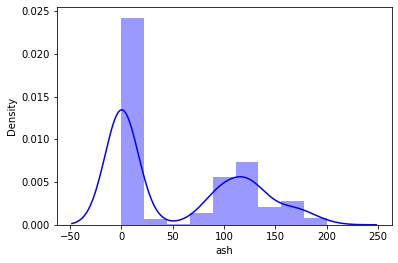

In [56]:
# 4.- Fly Ash (univariante analysis)
sns.distplot(df.ash, kde=True, color='blue');
print("Skew:", round(df.ash.skew(),2));

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


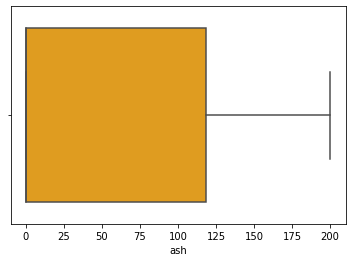

In [57]:
#4.- Fly Ash (univariante analysis)
sns.boxplot(df.ash, color='orange');

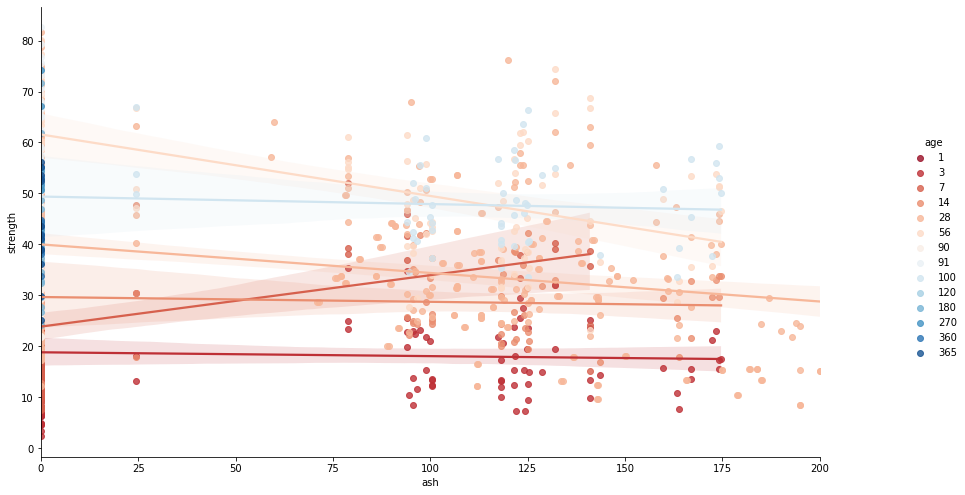

In [58]:
# 4.- Fly Ash (Bi-variante analysis)
sns.lmplot(x='ash', y='strength', data=df, hue='age', palette="RdBu"); #, hue='cyl'
fig = plt.gcf()
fig.set_size_inches(14, 7)

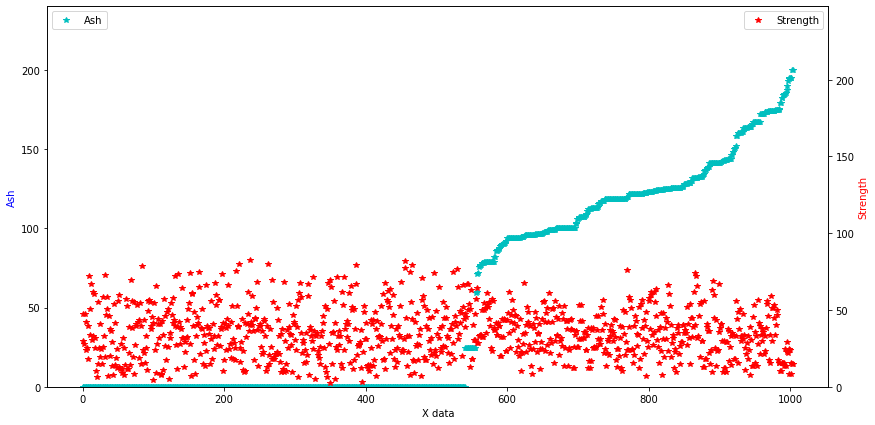

In [63]:
#4 Concrete Strength as variable dependent of fly ash concentration
df_st4 = df.sort_values('ash', ascending = True).reset_index(drop=True);
#
x = df_st4.index
y1 = df_st4.ash
y2 = df_st4.strength

fig, ax1 = plt.subplots(figsize=(14,7))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'c*', label='Ash')
ax2.plot(x, y2, 'r*', label='Strength')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xlabel('X data')
ax1.set_ylabel('Ash', color='blue')
ax2.set_ylabel('Strength', color='r')

max1 = df.ash.max()*1.2
max2 = df.strength.max()*3
#axes = plt.gca()
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

Data points with zero ash in the mix : 541 of 1005 points
Ave. concrete strength with zero fly ash : 35.76
Ave. concrete strength with fly ash : 34.65


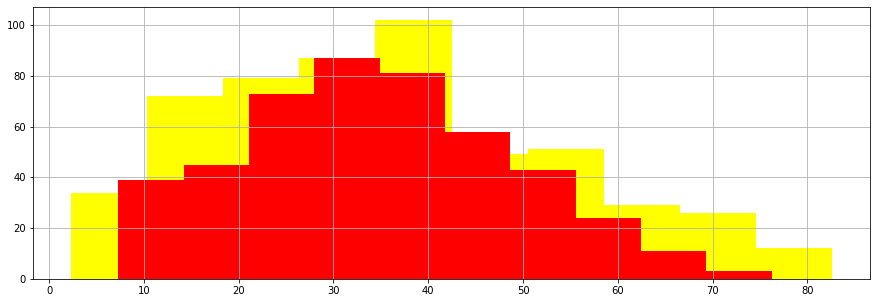

In [68]:
#4.- Zero fly ash
print('Data points with zero ash in the mix :',df.ash[df.ash==0].count(),'of', df.shape[0], 'points')
print('Ave. concrete strength with zero fly ash :', round(df[df.ash==0].strength.mean(),2))
print('Ave. concrete strength with fly ash :', round(df[df.ash>0].strength.mean(),2))
df[df.ash==0].strength.hist(color='yellow');
df[df.ash>0].strength.hist(color='red');
fig = plt.gcf();
fig.set_size_inches(15, 5);

In [69]:
#4. Replacing Ash zero values with the median of the values higher than zero
med_ash = df.ash[df.ash>0].median()
df_new.ash.loc[df_new.ash==0] = med_ash;

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


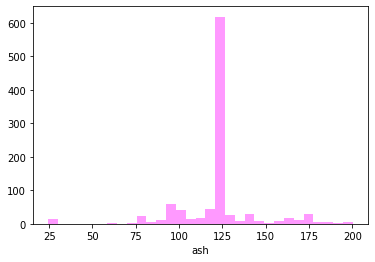

In [73]:
#4 New Plot
sns.distplot(df_new.ash, kde=False, color='magenta');

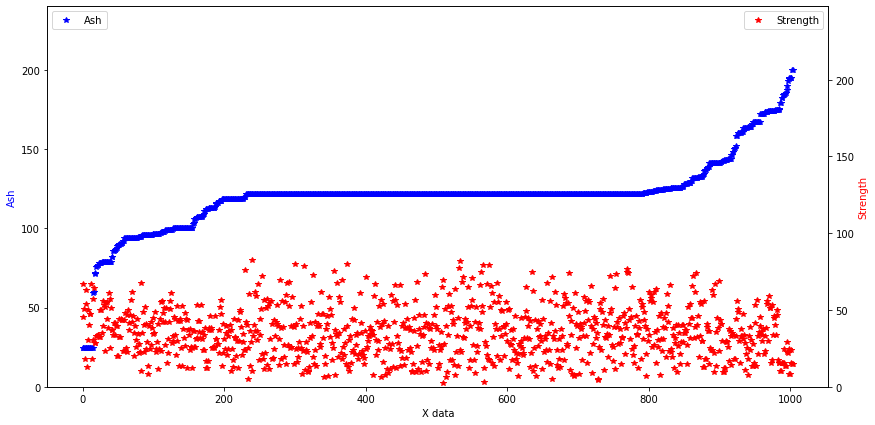

In [74]:
#4 Concrete Strength as variable dependent of Ash concentration
df_st3 = df_new.sort_values('ash', ascending = True).reset_index(drop=True);
#
x = df_st3.index
y1 = df_st3.ash
y2 = df_st3.strength

fig, ax1 = plt.subplots(figsize=(14,7))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*',label='Ash')
ax2.plot(x, y2, 'r*', label='Strength')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xlabel('X data')
ax1.set_ylabel('Ash', color='b')
ax2.set_ylabel('Strength', color='r')

max1 = df_new.ash.max()*1.2
max2 = df_new.strength.max()*3
#axes = plt.gca()
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

<p style="color:red"> Obs.: Strength shows slightly decreasing tendency with the ash concentration. No outlayers. Data has 566 points with zero ash concentration</p>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew: 0.03


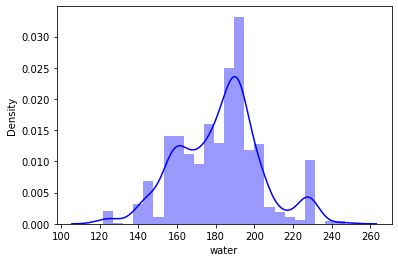

In [75]:
# 5.- Water (univariante analysis)
sns.distplot(df.water, kde=True, color='blue');
print("Skew:", round(df.water.skew(),2));

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


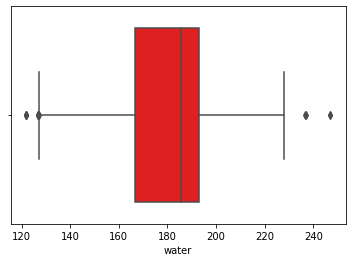

In [76]:
#5.- water outlayers (univariante analysis)
sns.boxplot(df.water, color='red');

In [77]:
#5.-Water
print('Outlayers above 230:',df.water[df.water>230].count())
print('Outlayers below 125:',df.water[df.water<125].count())

Outlayers above 230: 4
Outlayers below 125: 5


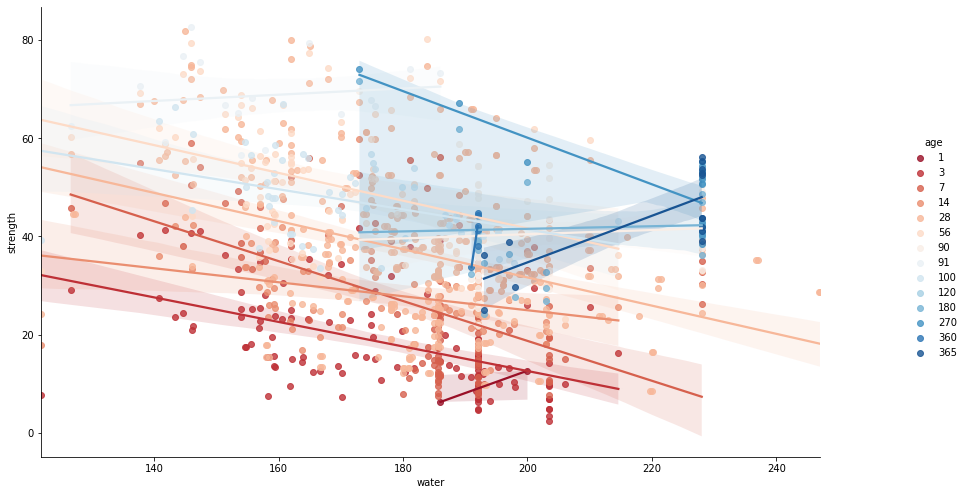

In [78]:
#5.- Water (Bi-variante analysis)
sns.lmplot(x='water', y='strength', data=df, hue='age', palette="RdBu"); #, hue='cyl'
fig = plt.gcf()
fig.set_size_inches(14, 7)

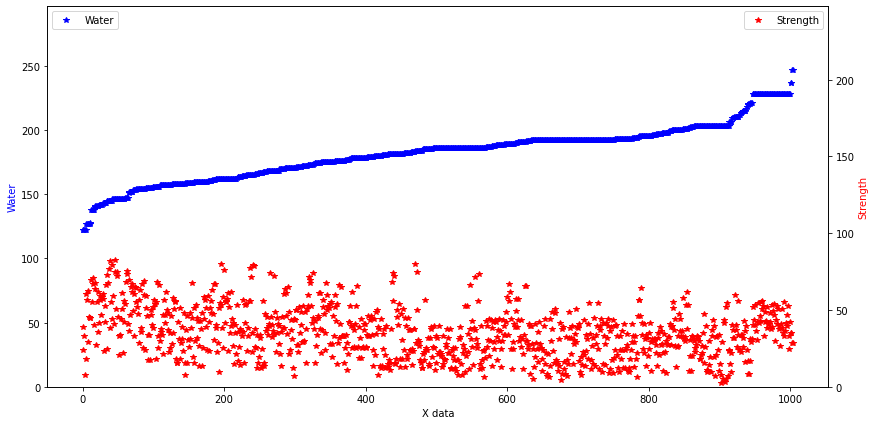

In [82]:
#5 Concrete Strength as variable dependent of water concentration
df_st5 = df.sort_values('water', ascending = True).reset_index(drop=True);
#
x = df_st5.index
y1 = df_st5.water
y2 = df_st5.strength

fig, ax1 = plt.subplots(figsize=(14,7))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*',label='Water')
ax2.plot(x, y2, 'r*',label='Strength')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xlabel('X data')
ax1.set_ylabel('Water', color='blue')
ax2.set_ylabel('Strength', color='r')

max1 = df.water.max()*1.2
max2 = df.strength.max()*3
#
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

<p style="color:red"> Obs.: Concrete strength shows decreasing tendency with the water concentration. 9 outlayers in both sides.</p>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew: 0.98


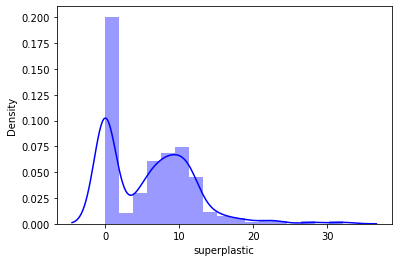

In [84]:
# 6.- Superplastic (univariante analysis)
sns.distplot(df.superplastic, kde=True, color='blue');
print("Skew:", round(df.superplastic.skew(),2));

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


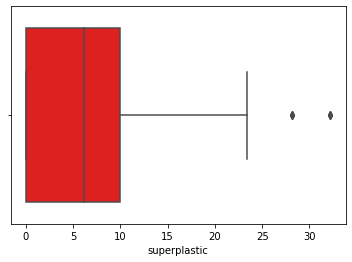

In [85]:
#6.- superplastic (univariante analysis)
sns.boxplot(df.superplastic, color='red');

In [86]:
#6.- Superplastic
print('Outlayers above 25:',df.superplastic[df.superplastic>25].count())

Outlayers above 25: 10


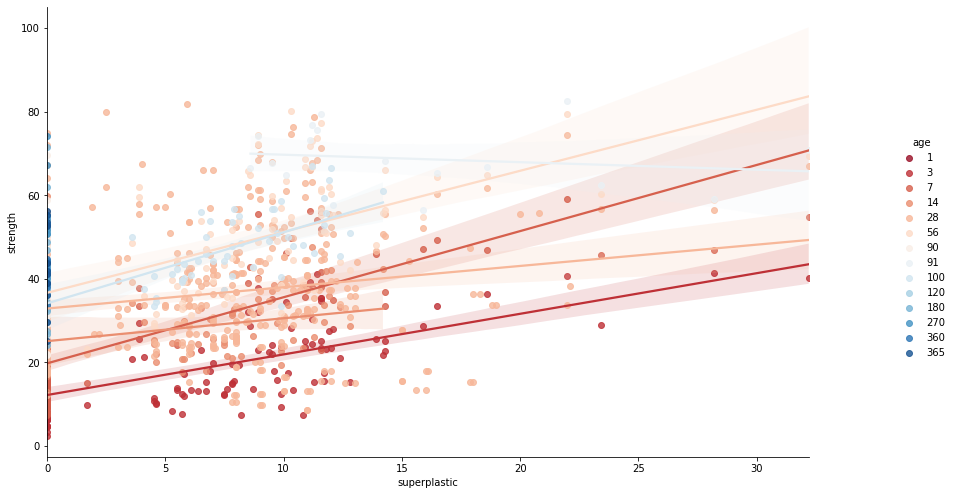

In [87]:
#6.- Superplastic (Bi-variante analysis)
sns.lmplot(x='superplastic', y='strength', data=df, hue='age', palette="RdBu"); #, hue='cyl'
fig = plt.gcf()
fig.set_size_inches(14, 7)

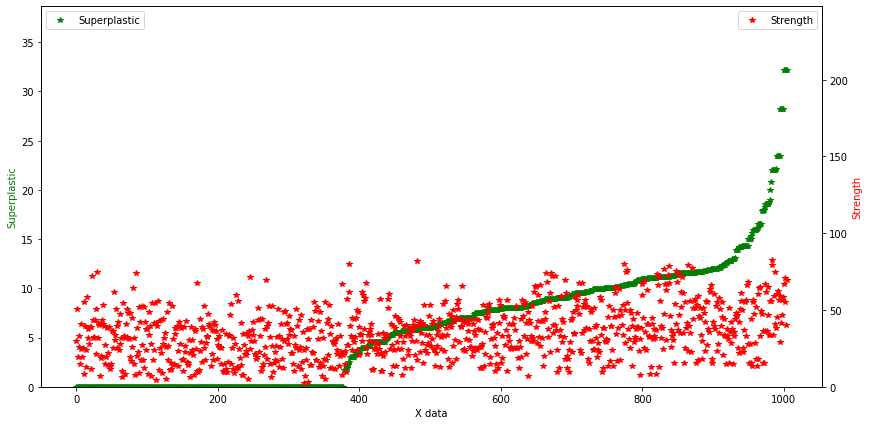

In [89]:
#6 Concrete Strength as variable dependent of superplastic concentration
df_st6 = df.sort_values('superplastic', ascending = True).reset_index(drop=True);
#
x = df_st6.index
y1 = df_st6.superplastic
y2 = df_st6.strength

fig, ax1 = plt.subplots(figsize=(14,7))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'g*',label='Superplastic')
ax2.plot(x, y2, 'r*',label='Strength')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


ax1.set_xlabel('X data')
ax1.set_ylabel('Superplastic', color='green')
ax2.set_ylabel('Strength', color='r')

max1 = df.superplastic.max()*1.2
max2 = df.strength.max()*3
#axes = plt.gca()
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

Data points with zero superplastic in the mix : 378 of 1005 points
Ave. concrete strength with zero superplastic : 29.54
Ave. concrete strength with superplastic : 38.69


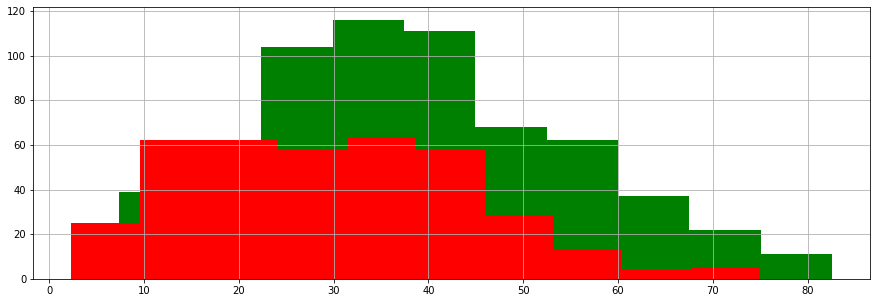

In [90]:
#6.- Superplastic
print('Data points with zero superplastic in the mix :',df.superplastic[df.superplastic==0].count(),'of', df.shape[0], 'points')
print('Ave. concrete strength with zero superplastic :', round(df[df.superplastic==0].strength.mean(),2))
print('Ave. concrete strength with superplastic :', round(df[df.superplastic>0].strength.mean(),2))
df[df.superplastic>0].strength.hist(color='green');
df[df.superplastic==0].strength.hist(color='red');
fig = plt.gcf();
fig.set_size_inches(15, 5);

In [91]:
#6. Replacing Ash zero values with the median of the values higher than zero
med_super = df.superplastic[df.superplastic>0].median()
df_new.superplastic.loc[df_new.superplastic==0] = med_super;

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


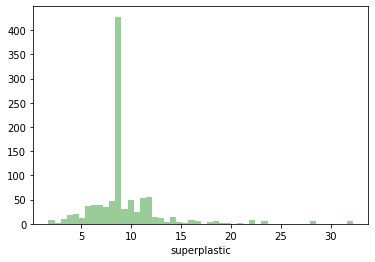

In [92]:
#6 New Plot
sns.distplot(df_new.superplastic, kde=False, color='green');

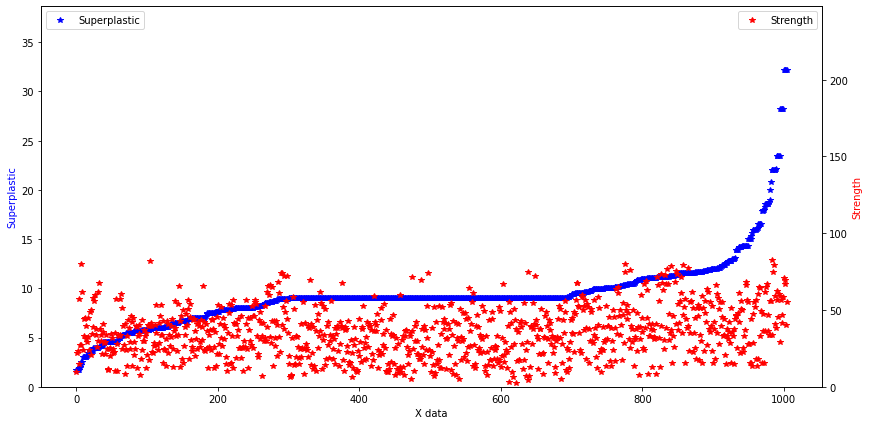

In [93]:
#6 Concrete Strength as variable dependent of Superplastic concentration
df_st3 = df_new.sort_values('superplastic', ascending = True).reset_index(drop=True);
#
x = df_st3.index
y1 = df_st3.superplastic
y2 = df_st3.strength

fig, ax1 = plt.subplots(figsize=(14,7))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*',label='Superplastic')
ax2.plot(x, y2, 'r*',label='Strength')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xlabel('X data')
ax1.set_ylabel('Superplastic', color='b')
ax2.set_ylabel('Strength', color='r')

max1 = df_new.superplastic.max()*1.2
max2 = df_new.strength.max()*3
#axes = plt.gca()
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

<p style="color:red"> Observation: Concrete strength shows increasing tendency with the superplastic concentration. 10 outlayers.</p>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew: -0.07


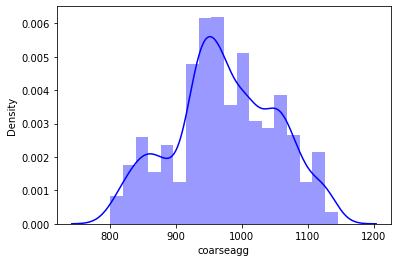

In [94]:
#7.- Coarse aggregate (univariante analysis)
sns.distplot(df.coarseagg, kde=True, color='blue');
print("Skew:", round(df.coarseagg.skew(),2));

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


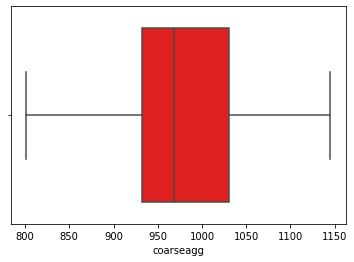

In [95]:
#7.- Coarse aggregate (univariante analysis)
sns.boxplot(df.coarseagg, color='red');

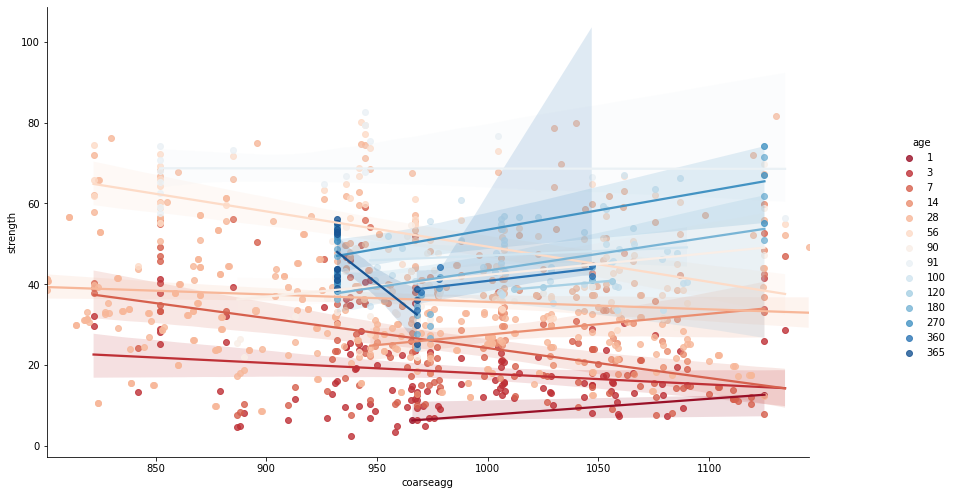

In [96]:
#7.- Coarse Aggregate (Bi-variante analysis)
sns.lmplot(x='coarseagg', y='strength', data=df, hue='age', palette="RdBu"); #, hue='cyl'
fig = plt.gcf()
fig.set_size_inches(14, 7)

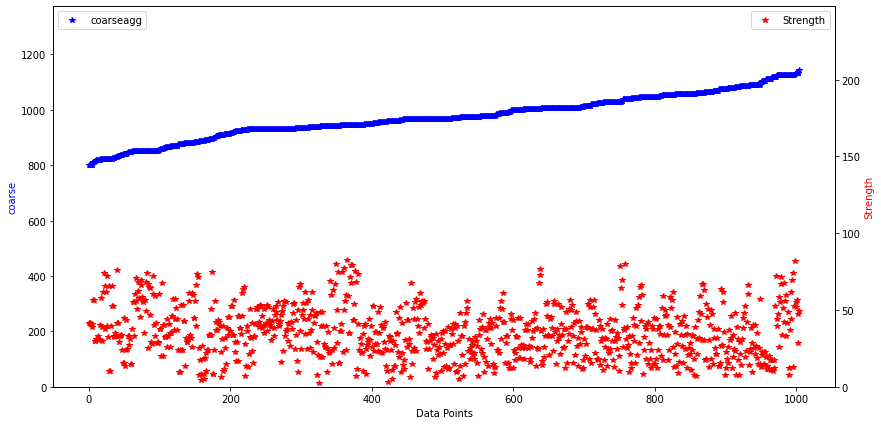

In [97]:
#7 Concrete Strength as variable dependent of coarse aggregate concentration
df_st7 = df.sort_values('coarseagg', ascending = True).reset_index(drop=True);
#
x = df_st7.index
y1 = df_st7.coarseagg
y2 = df_st7.strength

fig, ax1 = plt.subplots(figsize=(14,7))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*',label='coarseagg')
ax2.plot(x, y2, 'r*',label='Strength')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


ax1.set_xlabel('Data Points')
ax1.set_ylabel('coarse', color='blue')
ax2.set_ylabel('Strength', color='r')

max1 = df.coarseagg.max()*1.2
max2 = df.strength.max()*3
#axes = plt.gca()
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

<p style="color:red"> Obs.: Concrete strength doesnot shows tendency with the coarse aggregate concentration. No outlayers.</p>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew: -0.25


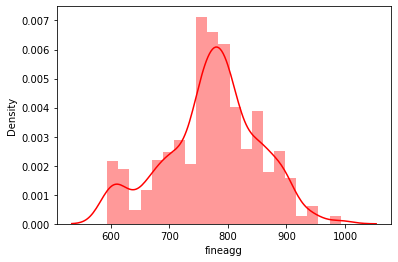

In [98]:
#8.- Fine aggregate (univariante analysis)
sns.distplot(df.fineagg, kde=True, color='red');
print("Skew:", round(df.fineagg.skew(),2));

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


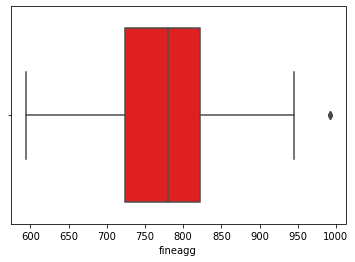

In [99]:
#8.- Fine aggregate (univariante analysis)
sns.boxplot(df.fineagg, color='red');

In [100]:
#8.- Fine aggregate
print('Outlayers above 950:',df.fineagg[df.fineagg>950].count())

Outlayers above 950: 5


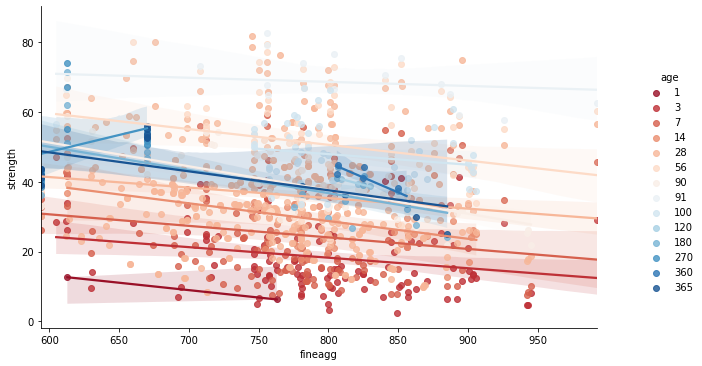

In [101]:
#8.- Fine Aggregate (Bi-variante analysis)
sns.lmplot(x='fineagg', y='strength', data=df, hue='age', palette="RdBu");
fig = plt.gcf()
fig.set_size_inches(10, 5)

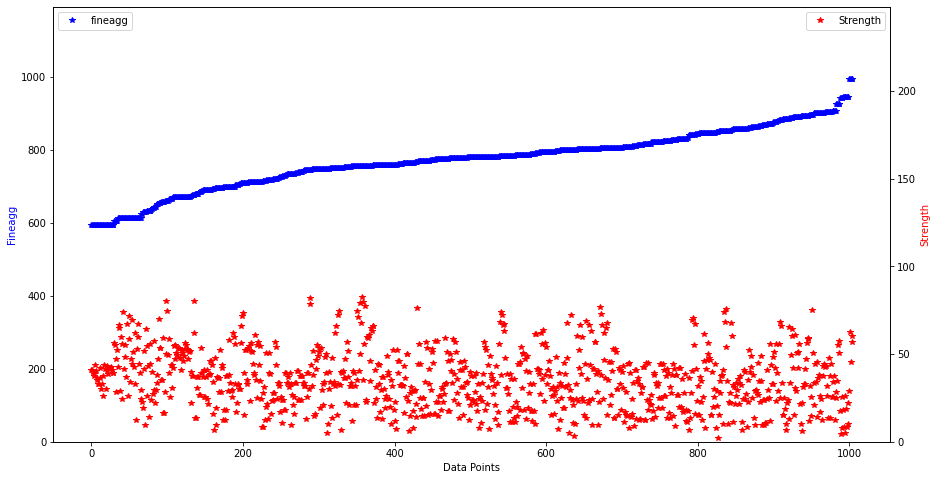

In [102]:
#8 Concrete Strength as variable dependent of fine aggregate concentration
df_st8 = df.sort_values('fineagg', ascending = True).reset_index(drop=True);
#
x = df_st8.index
y1 = df_st8.fineagg
y2 = df_st8.strength

fig, ax1 = plt.subplots(figsize=(15,8))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*',label='fineagg')
ax2.plot(x, y2, 'r*',label='Strength')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xlabel('Data Points')
ax1.set_ylabel('Fineagg', color='blue')
ax2.set_ylabel('Strength', color='r')

max1 = df.fineagg.max()*1.2
max2 = df.strength.max()*3
#axes = plt.gca()
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

<p style="color:red"> Observation: Concrete strength shows sligthly drop tendency with the fine aggregate concentration. 5 points outlayers.</p>

Skew: 3.25


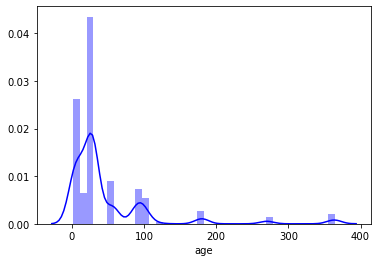

In [ ]:
#9.- Age (univariante analysis)
sns.distplot(df.age, kde=True, color='blue');
print("Skew:", round(df.age.skew(),2));

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


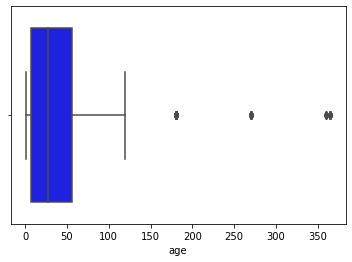

In [103]:
#9.- Age (univariante analysis)
sns.boxplot(df.age, color='blue');

In [104]:
#9.- Age
print('Outlayers above 150:',df.age[df.age>150].count())

Outlayers above 150: 59


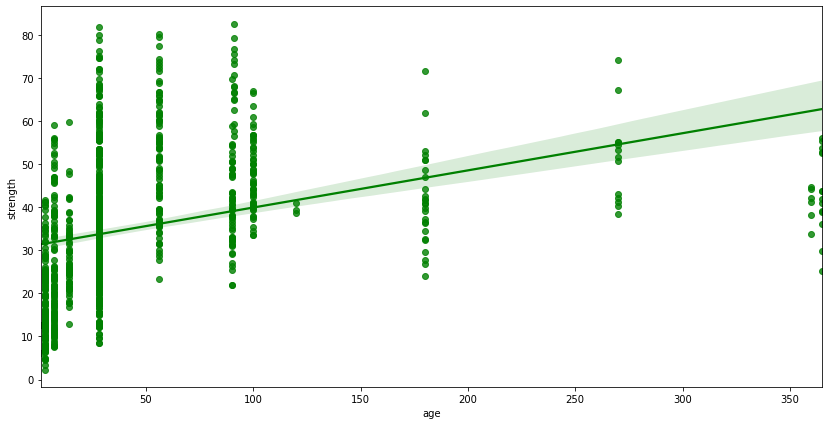

In [106]:
#9.- Age (Bi-variante analysis)
sns.regplot(x='age', y='strength', data=df, color='green');
fig = plt.gcf()
fig.set_size_inches(14,7 )

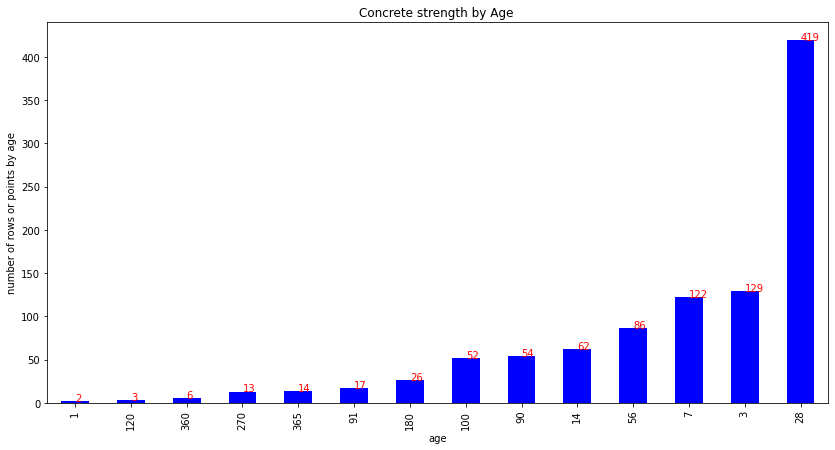

In [107]:

cust_z =df.groupby('age').age.count().sort_values()
cust_z.plot(kind='bar', title='Concrete strength by Age ', color='b', figsize=(14,7))
plt.ylabel('number of rows or points by age')
for i, v in enumerate(cust_z):
    plt.text(i, v, int(v),color='r')

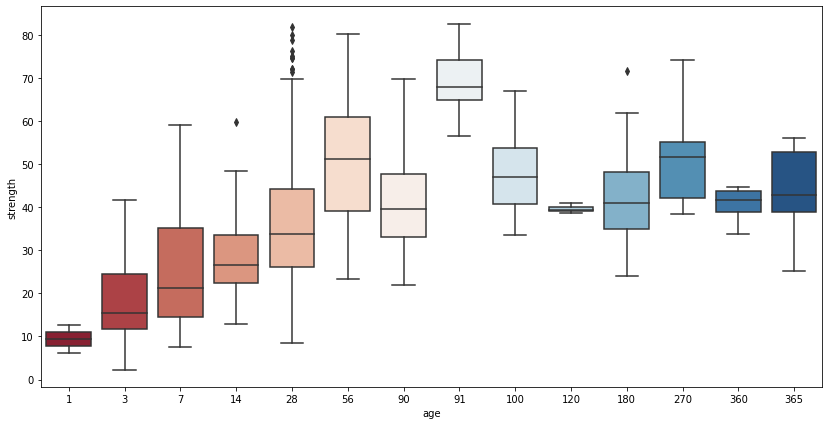

In [108]:
#9.- Age (Bi-variante analysis)
sns.boxplot(x='age', y='strength', data=df, palette="RdBu");
fig = plt.gcf()
fig.set_size_inches(14, 7)

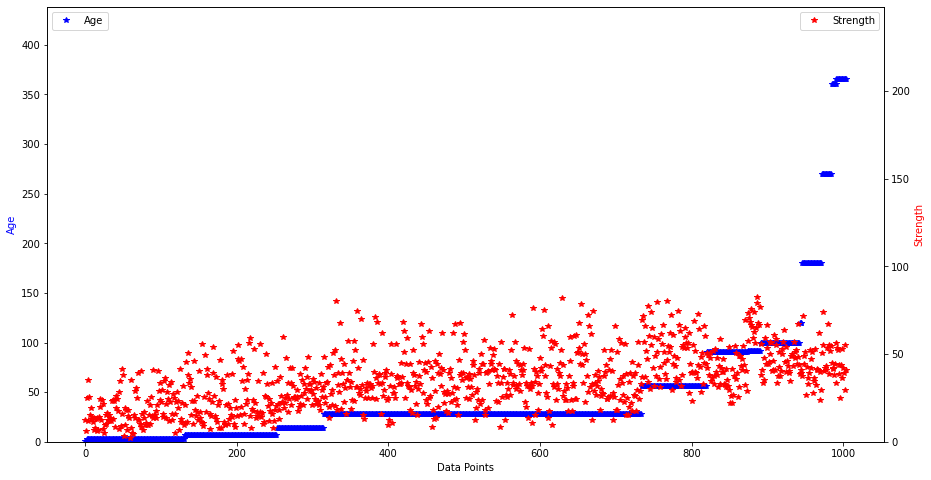

In [109]:
#9 Concrete Strength as variable dependent of age
df_st9 = df.sort_values('age', ascending = True).reset_index(drop=True);
#
x = df_st9.index
y1 = df_st9.age
y2 = df_st9.strength

fig, ax1 = plt.subplots(figsize=(15,8))


ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*',label='Age')
ax2.plot(x, y2, 'r*',label='Strength')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


ax1.set_xlabel('Data Points')
ax1.set_ylabel('Age', color='blue')
ax2.set_ylabel('Strength', color='r')

max1 = df.age.max()*1.2
max2 = df.strength.max()*3
#
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()

<p style="color:red"> Observation: Concrete strength shows a covergency to 40 Mpa with the age.</p>

<p style="color:Blue"> 2.2- Feature Engineering Techniques</p>

In [125]:
print('Slag with zero values (%) :', round(df.slag[df.slag==0].count()*100/df.shape[0],2))
print('Ash with zero values (%) :', round(df.ash[df.ash==0].count()*100/df.shape[0],2))
print('Superplastic with zero values (%) :', round(df.superplastic[df.superplastic==0].count()*100/df.shape[0],2))

Slag with zero values (%) : 46.77
Ash with zero values (%) : 53.83
Superplastic with zero values (%) : 37.61


<p style="color:orange"> 2.2.2.- Separate independent and dependent variables</p> 

In [126]:
# Independentes variables
X=df.drop(columns=['strength'])
y=df.strength
print("X.shape :",X.shape)
print("y.shape :",y.shape)
X.head()

X.shape : (1005, 8)
y.shape : (1005,)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


<p style="color:orange"> 2.2.3.- Scale all the columns </p>

In [144]:
from sklearn import preprocessing
#
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-1.316792,1.624984,-0.865375,1.004499,-1.019640,-0.033232,-0.301222,-0.280312
1,-1.052152,-0.346502,1.071486,-1.114710,0.805602,1.372475,0.292797,-0.500082
2,-0.274530,-0.836471,0.625836,0.249648,-0.090119,-0.225388,1.102257,-0.280312
3,-0.121115,0.487142,-0.865375,2.153185,-1.019640,-0.546508,-1.278800,-0.280312
4,-1.187348,1.292920,-0.865375,0.526271,0.518296,0.941736,-0.946299,-0.280312


<p style="color:orange"> 2.2.4- Split the data into: train, validation, and test </p>

In [145]:
from sklearn.model_selection import train_test_split
# Split full data between train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=0)

   <p style="color:orange"> 2.2.5.- High Correlated Drivers</p> 

In [146]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [147]:
vif = pd.DataFrame()

vif["vif"] = [variance_inflation_factor(X_scaled.values,i) for i in range(X_scaled.shape[1])]

vif["features"] = X_scaled.columns
vif.sort_values(by='vif', ascending=False, inplace=True)
vif

,vif,features
0,7.448990,cement
1,7.263275,slag
6,6.972305,fineagg
3,6.838492,water
2,6.084539,ash
5,4.956211,coarseagg
4,2.867335,superplastic
7,1.120113,age


<p style="color:orange"> 2.2.6- Evaluating statsmodel and p values </p>

In [148]:
# Joing train data
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
481,-0.257271,-0.836471,0.691281,-1.686708,1.076009,0.407825,1.582952,0.159228,44.14
698,0.186674,-0.836471,0.801915,0.202763,0.011284,-1.230017,0.529408,-0.280312,42.64
436,-0.033860,-0.836471,1.026297,-1.058447,0.653499,1.021693,0.059922,-0.500082,38.77
258,-0.252476,-0.836471,0.674141,-1.677331,1.380216,0.173111,1.448457,-0.500082,42.29
568,2.362289,-0.836471,-0.865375,0.324665,-1.019640,1.942496,-1.988635,2.105762,61.92


In [149]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'strength ~ cement+slag+ash+water+superplastic+coarseagg+\
                        fineagg+age', data = data_train).fit()

In [150]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     131.6
Date:                Fri, 30 Oct 2020   Prob (F-statistic):          1.16e-133
Time:                        14:33:45   Log-Likelihood:                -2638.8
No. Observations:                 703   AIC:                             5296.
Df Residuals:                     694   BIC:                             5337.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.6820      0.393     90.737   

<p style="color:Blue"> 2.3- Linear regression and three shrinkage methods (Full data)</p>

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

<p style="color:orange"> 2.3.1- Linear regression model </p>

In [152]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
# Let us check the intercept for the model
intercept = regression_model.intercept_
print("The intercept is {}".format(round(intercept),3))
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coeff. for {} is   :{}".format(col_name, round(regression_model.coef_[idx],3)))

The intercept is 36.0
The coeff. for cement is   :12.676
The coeff. for slag is   :8.594
The coeff. for ash is   :5.646
The coeff. for water is   :-2.745
The coeff. for superplastic is   :2.331
The coeff. for coarseagg is   :1.528
The coeff. for fineagg is   :1.583
The coeff. for age is   :6.868


In [154]:
# Train data score
trs231 = round(regression_model.score(X_train, y_train),4)
print('Linear Regression - Train score :',trs231)
# Validation data score
tes231 = round(regression_model.score(X_test, y_test),4)
print('Linear Regression - test score :',tes231)

Linear Regression - Train score : 0.6028
Linear Regression - test score : 0.5955


In [155]:
from sklearn.metrics import mean_squared_error
#
y_pred = regression_model.predict(X_test)
#
rmse231 = round(mean_squared_error(y_test, y_pred, squared=False),3) # squared=True returns only MSE
print('RMSE final model :',rmse231)
#
from sklearn.metrics import mean_absolute_error
mae231 = round(mean_absolute_error(y_test, y_pred),3)
print('MAE model :',mae231)

RMSE final model : 10.147
MAE model : 8.084


<p style="color:orange"> 2.3.2- RIDGE model - Shrinkage method </p>

In [156]:
ridge = Ridge(alpha=0.3)
ridge_model = ridge.fit(X_train, y_train)
ridge_prediction = ridge_model.predict(X_test)
ridge_coefs = dict(zip(['Intercept'] + df.columns.tolist()[:-1], 
        np.round(np.concatenate((ridge_model.intercept_, ridge_model.coef_), 
                                axis=None), 3)))

print('Ridge Regression coefficients:')
ridge_coefs

Ridge Regression coefficients:


{'Intercept': 35.68,
 'age': 6.862,
 'ash': 5.573,
 'cement': 12.591,
 'coarseagg': 1.471,
 'fineagg': 1.511,
 'slag': 8.513,
 'superplastic': 2.33,
 'water': -2.801}

In [157]:
trs232 = round(ridge.score(X_train, y_train),4)
print('Ridge Model - Train Score =',trs232)
tes232 = round(ridge.score(X_test, y_test),4)
print('Ridge Model - Validation Score =',tes232)

Ridge Model - Train Score = 0.6028
Ridge Model - Validation Score = 0.5956


In [158]:
# Y prediction
y_pred = ridge_prediction
#
rmse232 = round(mean_squared_error(y_test, y_pred, squared=False),3) # squared=True returns only MSE
print('Final model :',rmse232)
#
mae232 = round(mean_absolute_error(y_test, y_pred),3)
print('MAE model :',mae232)

Final model : 10.146
MAE model : 8.086


<p style="color:orange"> 2.3.3- LASSO model - Shrinkage method </p>

In [159]:
lasso = Lasso(alpha=0.1)
lasso_model = lasso.fit(X_train, y_train)
lasso_prediction = lasso_model.predict(X_test)
lasso_coefs = dict(
    zip(['Intercept'] + df.columns.tolist()[:-1], 
        np.round(np.concatenate((lasso_model.intercept_, lasso_model.coef_), axis=None), 3)))

print('LASSO coefficients:')
lasso_coefs

LASSO coefficients:


{'Intercept': 35.649,
 'age': 6.679,
 'ash': 4.008,
 'cement': 10.782,
 'coarseagg': 0.141,
 'fineagg': -0.0,
 'slag': 6.744,
 'superplastic': 2.211,
 'water': -4.001}

In [160]:
trs233 = round(lasso.score(X_train, y_train),4)
print('LASSO model - Train score =', trs233)
tes233 = round(lasso.score(X_test, y_test),4)
print('LASSO model - Validation score =',tes233)

LASSO model - Train score = 0.6008
LASSO model - Validation score = 0.5961


In [161]:
# Y prediction
y_pred = lasso_prediction
#
rmse233 = round(mean_squared_error(y_test, y_pred, squared=False),3) # squared=True returns only MSE
print('RMSE final model :',rmse233)
#
mae233 = round(mean_absolute_error(y_test, y_pred),3)
print('MAE model :',mae233)

RMSE final model : 10.14
MAE model : 8.151


<p style="color:orange"> 2.3.4- ElasticNet model - Shrinkage method </p>

Combine RIDGE and LASSO models

In [163]:
elastic_net = ElasticNet(alpha=0.05)
elastic_net_model = elastic_net.fit(X_train, y_train)
elastic_net_prediction = elastic_net_model.predict(X_test)
elastic_net_coefs = dict(
    zip(['Intercept'] + df.columns.tolist()[:-1], 
        np.round(np.concatenate((elastic_net_model.intercept_, 
                                 elastic_net_model.coef_), axis=None), 3)))
print('Elastic Net coefficients:')
elastic_net_coefs

Elastic Net coefficients:


{'Intercept': 35.639,
 'age': 6.543,
 'ash': 3.151,
 'cement': 9.763,
 'coarseagg': -0.202,
 'fineagg': -0.696,
 'slag': 5.843,
 'superplastic': 2.492,
 'water': -4.315}

In [164]:
trs234 = round(elastic_net.score(X_train, y_train),4)
print('ElasticNet model - Train score =', trs234)
tes234 = round(elastic_net.score(X_test, y_test),4)
print('Elastic model - Validation score =',tes234)

ElasticNet model - Train score = 0.5983
Elastic model - Validation score = 0.593


In [165]:
# Y prediction
y_pred = elastic_net_prediction
#
rmse234 = round(mean_squared_error(y_test, y_pred, squared=False),3) # squared=True returns only MSE
print('RMSE model :',rmse234)
#
mae234 = round(mean_absolute_error(y_test, y_pred),3)
print('MAE model :',mae234)

RMSE model : 10.179
MAE model : 8.213


<p style="color:Blue"> 2.4- Polynomial models reflecting the non-linear interaction between some dimensions (Full data)</p>

In [166]:
from sklearn.preprocessing import PolynomialFeatures

In [167]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [168]:
X_poly = poly.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.3, random_state=0)
X_poly.shape

(1005, 37)

<p style="color:orange"> 2.4.1- Linear regression model (Polynomial)</p>

In [169]:
regression_model.fit(X_train, y_train)
# Train data score
trs241 = round(regression_model.score(X_train, y_train),4)
print('Linear Regression - Train score :',trs241)
# Validation data score
tes241 = round(regression_model.score(X_test, y_test),4)
print('Linear Regression - Validation score :',tes241)

Linear Regression - Train score : 0.7649
Linear Regression - Validation score : 0.6805


In [170]:
# Y prediction
y_pred = regression_model.predict(X_test)
#
rmse241 = round(mean_squared_error(y_test, y_pred, squared=False),3) # squared=True returns only MSE
print('RMSE model :',rmse241)
#
mae241 = round(mean_absolute_error(y_test, y_pred),3)
print('MAE model :',mae241)

RMSE model : 9.018
MAE model : 7.056


<p style="color:orange"> 2.4.2- RIDGE model - Shrinkage method (Polynomial)</p>

In [171]:
ridge = Ridge(alpha=0.3)
ridge_model = ridge.fit(X_train, y_train)
ridge_prediction = ridge_model.predict(X_test)
trs242 = round(ridge.score(X_train, y_train),4)
print('Ridge Model - Train Score =',trs242)
tes242 = round(ridge.score(X_test, y_test),4)
print('Ridge Model - Validation Score =',tes242)
#ridge.coef_

Ridge Model - Train Score = 0.7649
Ridge Model - Validation Score = 0.6804


In [172]:
# Y prediction
y_pred = ridge_prediction
#
rmse242 = round(mean_squared_error(y_test, y_pred, squared=False),3) # squared=True returns only MSE
print('RMSE model :',rmse242)
#
mae242 = round(mean_absolute_error(y_test, y_pred),3)
print('MAE model :',mae242)

RMSE model : 9.019
MAE model : 7.058


<p style="color:orange"> 2.4.3- LASSO model - Shrinkage method (Polynomial)</p>

In [190]:
lasso = Lasso(alpha=0.1)
lasso_model = lasso.fit(X_train, y_train)
trs243 = round(lasso.score(X_train, y_train),4)
print('LASSO model - Train score =', trs243)
tes243 = round(lasso.score(X_test, y_test),4)
print('LASSO model - Validation score =',tes243)

LASSO model - Train score = 0.7573
LASSO model - Validation score = 0.6769


In [191]:
# Y prediction
y_pred = lasso.predict(X_test)
#
rmse243 = round(mean_squared_error(y_test, y_pred, squared=False),3) # squared=True returns only MSE
print('RMSE model :',rmse243)
#
mae243 = round(mean_absolute_error(y_test, y_pred),3)
print('MAE model :',mae243)

RMSE model : 9.069
MAE model : 7.092


<p style="color:orange"> 2.4.4- ElasticNet model - Shrinkage method (Polynomial)</p>

Combine RIDGE and LASSO models

In [192]:
elastic_net = ElasticNet(alpha=0.05)
elastic_net_model = elastic_net.fit(X_train, y_train)
trs244 = round(elastic_net.score(X_train, y_train),4)
print('ElasticNet model - Train score =', trs244)
tes244 = round(elastic_net.score(X_test, y_test),4)
print('Elastic model - Validation score =',tes244)

ElasticNet model - Train score = 0.7541
Elastic model - Validation score = 0.674


In [193]:
# Y prediction
y_pred = elastic_net.predict(X_test)
#
rmse244 = round(mean_squared_error(y_test, y_pred, squared=False),3) # squared=True returns only MSE
print('RMSE model :',rmse244)
#
mae244 = round(mean_absolute_error(y_test, y_pred),3)
print('MAE model :',mae244)

RMSE model : 9.109
MAE model : 7.187


<p style="color:Blue"> 2.5- Summary simple Linear regression and three shrinkage methods</p>

- There is an improvement from linear regression to polinomial regression

- Linear regression shows a better result than the Shrinkage methods (RIDGE, LASSO, and ElasticNet)

In [194]:
#Summary
Summary2 = pd.DataFrame({'Method':['Liniar Regression','RIDGE','LASSO','ElasticNet'], 
                         'Train_Score': [trs231, trs232, trs233, trs234],
                         'Test_Score':  [tes231, tes232, tes233, tes234],
                         'RMSE':        [rmse231,rmse232, rmse233, rmse234],
                         'MAE' :        [mae231, mae232, mae233, mae234],
                        'Train_Score_Poly': [trs241, trs242, trs243, trs244],
                         'Test_Score_Poly':  [tes241, tes242, tes243, tes244],
                         'RMSE_Poly':        [rmse241,rmse242, rmse243, rmse244],
                         'MAE_Poly' :        [mae241, mae242, mae243, mae244] })
                         
Summary2

,Method,Train_Score,Test_Score,RMSE,MAE,Train_Score_Poly,Test_Score_Poly,RMSE_Poly,MAE_Poly
0,Liniar Regression,0.6028,0.5955,10.147,8.084,0.7649,0.6805,9.018,7.056
1,RIDGE,0.6028,0.5956,10.146,8.086,0.7649,0.6804,9.019,7.058
2,LASSO,0.6008,0.5961,10.140,8.151,0.7573,0.6769,9.069,7.092
3,ElasticNet,0.5983,0.5930,10.179,8.213,0.7541,0.6740,9.109,7.187


# 3.- K-Fold Cross Validation Tehnique

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
#
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

<p style="color:Orange"> 3.1.- Linear regression - K-Fold Cross Validation</p>

In [196]:
# Linear regression using Initial full data
X=df.drop(columns=['strength'])
y=df.strength
#
# Scaling data
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [197]:
model = LinearRegression()
results = cross_val_score(model, X_scaled, y, cv=kfold)
print(results)
cv31 = results.mean()*100
cvsd31 = results.std()*100
print("Accuracy: %0.3f%% (%0.3f%%)"%(cv31,cvsd31))

[0.64179999 0.68027597 0.61058134 0.60336202 0.62968819 0.5643505
 0.62975819 0.58188603 0.44824234 0.51034617]
Accuracy: 59.003% (6.462%)


<p style="color:Orange"> 3.1.2- Linear regression (Age Log scale) - K-Fold Cross Validation</p>

In [198]:
#Converting the age to log scale for linear regression
df_log = df.copy()

In [199]:
df_log.age = np.log(df_log.age)

In [200]:
X=df_log.drop(columns=['strength'])
y=df_log.strength
#
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3.332205
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,2.639057
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,3.332205
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,3.332205
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,3.332205


In [201]:
# Scaling data
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
#
model = LinearRegression()
results = cross_val_score(model, X_scaled, y, cv=kfold)
print(results)
cv312 = results.mean()*100
cvsd312 = results.std()*100
print("Accuracy: %0.3f%% (%0.3f%%)"%(cv312,cvsd312))

[0.82775646 0.83804212 0.80018258 0.78294961 0.81580767 0.79321537
 0.83573284 0.8135929  0.75536282 0.79951865]
Accuracy: 80.622% (2.423%)


<p style="color:Orange"> 3.2.- Bagging regressor - K-Fold Cross Validation</p>

In [202]:
from sklearn.ensemble import BaggingRegressor
# Linear regression using Initial full data
X=df.drop(columns=['strength'])
y=df.strength
#
# Scaling data
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
#
model = BaggingRegressor()
results = cross_val_score(model, X_scaled, y, cv=kfold)
print(results)
cv32 = results.mean()*100
cvsd32 = results.std()*100
print("Accuracy: %0.3f%% (%0.3f%%)"%(cv32,cvsd32))

[0.91074924 0.93203035 0.88372124 0.88679654 0.90505812 0.92855339
 0.89444881 0.88036807 0.8540655  0.89870217]
Accuracy: 89.745% (2.210%)


<p style="color:Orange"> 3.3.- Gradient Boosting for regression - K-Fold Cross Validation</p>

In [203]:
from sklearn.ensemble import GradientBoostingRegressor
#
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
model = GradientBoostingRegressor()
results = cross_val_score(model, X_scaled, y, cv=kfold)
print(results)
cv33 = results.mean()*100
cvsd33 = results.std()*100
print("Accuracy: %0.3f%% (%0.3f%%)"%(cv33,cvsd33))

[0.92926359 0.91797541 0.86518623 0.87845378 0.90849483 0.92942954
 0.90387668 0.89812804 0.8763751  0.91108414]
Accuracy: 90.183% (2.112%)


<p style="color:Orange"> 3.4.- Random Forest regressor - K-Fold Cross Validation</p>

In [204]:
from sklearn.ensemble import RandomForestRegressor
#
model = RandomForestRegressor()
results = cross_val_score(model, X_scaled, y, cv=kfold)
print(results)
cv34 = results.mean()*100
cvsd34 = results.std()*100
print("Accuracy: %0.3f%% (%0.3f%%)"%(cv34,cvsd34))

[0.93001516 0.94083068 0.89499757 0.88904454 0.91513283 0.93715347
 0.89323509 0.89395732 0.89404317 0.93305047]
Accuracy: 91.215% (2.014%)


<p style="color:Orange"> 3.5.- XGBoost regressor - K-Fold Cross Validation</p>

In [205]:
import xgboost as xgb
#
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
results = cross_val_score(model, X_scaled, y, cv=kfold)
print(results)
cv35 = results.mean()*100
cvsd35 = results.std()*100
print("Accuracy: %0.3f%% (%0.3f%%)"%(cv35,cvsd35))

[14:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:39:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

<p style="color:Orange"> 3.6.- LGBM regressor - K-Fold Cross Validation</p>

In [206]:
import lightgbm as lgbm
#
model = lgbm.LGBMRegressor()
results = cross_val_score(model, X_scaled, y, cv=kfold)
print(results)
cv36 = results.mean()*100
cvsd36 = results.std()*100
print("Accuracy: %0.3f%% (%0.3f%%)"%(cv36,cvsd36))

[0.94083933 0.96486054 0.91315255 0.90752419 0.94456884 0.94915937
 0.91963401 0.90942637 0.89556949 0.93422318]
Accuracy: 92.790% (2.095%)


<p style="color:Orange"> 3.7.- Summary of cross_validation techniques</p>

XGBoostin has the highest Score

In [208]:
#Summary
Summary3 = pd.DataFrame({'Method':['Linear Regression','Linear Regression_Log','Bagging','Gradient Boosting',
                                  'Random Forest', 'XGBoosting','LGBM' ], 
                         'Score': [cv31, cv312, cv32, cv33, cv34, cv35, cv36],
                         'SD':  [cvsd31, cvsd312, cvsd32, cvsd33, cvsd34, cvsd35, cvsd36],
                          })
                         
Summary3

,Method,Score,SD
0,Linear Regression,59.002907,6.461786
1,Linear Regression_Log,80.621610,2.423262
2,Bagging,89.744934,2.210098
3,Gradient Boosting,90.182673,2.111902
4,Random Forest,91.214603,2.014279
5,XGBoosting,93.476359,2.184150
6,LGBM,92.789579,2.095430


# 4.- Tunning parameters GridSearchCV and RandomizedSearchCV

In [209]:
# Independentes variables
X=df.drop(columns=['strength'])  # original data
y=df.strength
# Scalling
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
#
# Split full data between train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=0)
# Split train data between actual train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

<p style="color:blue"> 4.1.- GradientBoostingRegressor GridsearchCV </p>

In [212]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
#
GBR = GradientBoostingRegressor()
#
params_GBR={
    'loss' :['ls','lad', 'huber','quantile'],
    'n_estimators' :[100, 150, 200, 250,350,500],
    'learning_rate'  :[0.01, 0.05, 0.1, 0.15, 0.2],
    'max_depth'  :[1,2,3],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf' :[1, 2, 3, 5, 7, 10],
}
#
random_searchGB=GridSearchCV(GBR,param_grid=params_GBR,
                                   n_jobs=-1,cv=seed,verbose=3);



In [211]:
#I am just mentioning here that the  GridSearch took over 1/2 hour to run
#random_searchGB.fit(X_train, y_train);
#random_searchGB.best_params_


In [213]:
gblr = GradientBoostingRegressor(loss='ls',n_estimators = 250, max_depth=3, 
                                  learning_rate=0.2, min_samples_leaf=3,
                                  min_samples_split=5, random_state=1)

In [214]:
gblr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=250,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [215]:
trs41 = round(gblr.score(X_train, y_train),4)
tes41 = round(gblr.score(X_val, y_val),4)
print('GradientBoostingRegressor - Train score :', trs41)
print('GradientBoostingRegressor - Validate score :', tes41)

GradientBoostingRegressor - Train score : 0.9877
GradientBoostingRegressor - Validate score : 0.9208


In [216]:
# Y prediction
y_pred = gblr.predict(X_test)
#
rmse41 = round(mean_squared_error(y_test, y_pred, squared=False),3) # squared=True returns only MSE
print('RMSE model :',rmse41)
#
mae41 = round(mean_absolute_error(y_test, y_pred),3)
print('MAE model :',mae41)

RMSE model : 4.59
MAE model : 3.317


<p style="color:blue"> 4.2.- GradientBoostingRegressor RandomizedsearchCV </p>

In [217]:
random_search=RandomizedSearchCV(GBR,param_distributions=params_GBR,
                                   n_iter=10,n_jobs=-1,cv=seed,verbose=3);

random_search.fit(X_train, y_train);

random_search.best_params_

Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   18.7s finished


{'learning_rate': 0.15,
 'loss': 'ls',
 'max_depth': 2,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 500}

In [218]:
gblrscv = GradientBoostingRegressor(loss='ls',n_estimators = 200, max_depth=2, 
                                  learning_rate=0.2, min_samples_leaf=7,
                                  min_samples_split=5, random_state=1)
#
gblrscv.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=7, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [219]:
trs42 = round(gblrscv.score(X_train, y_train),4)
tes42 = round(gblrscv.score(X_val, y_val),4)
print('GradientBoostingRegressor - Train score :', trs42)
print('GradientBoostingRegressor - Validate score :', tes42)

GradientBoostingRegressor - Train score : 0.9573
GradientBoostingRegressor - Validate score : 0.9234


In [220]:
# Y prediction
y_pred = gblrscv.predict(X_test)
#
rmse244 = round(mean_squared_error(y_test, y_pred, squared=False),3) # squared=True returns only MSE
print('RMSE model :',rmse244)
#
mae244 = round(mean_absolute_error(y_test, y_pred),3)
print('MAE model :',mae244)

RMSE model : 4.569
MAE model : 3.283


<p style="color:blue"> 4.3.- XGBoost Regressor RandomizedsearchCV </p>

In [221]:
lxgbr = xgb.XGBRegressor()
#
params={
    "n_estimators"     :[10,50,100,150,250,350,500],
    "learning_rate"    :[0.001, 0.05, 0.1, 0.5, 0.75, 0.1],
    "max_depth"        :[   1,    2,   3],
    "min_child_weight" :[   1,    3,    5,    7],
    "gamma"            :[0.0,   0.1,  0.2,  0.3, 0.4],
    "colsample_bytree" :[0.3,   0.4,  0.5,  0.7]
}
#
random_searchxgbr=RandomizedSearchCV(lxgbr,param_distributions=params,
                                 n_iter=10,n_jobs=-1,cv=10,verbose=3)

In [222]:
random_searchxgbr.fit(X_train, y_train);
random_searchxgbr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.2s


[14:42:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished


{'colsample_bytree': 0.7,
 'gamma': 0.3,
 'learning_rate': 0.5,
 'max_depth': 2,
 'min_child_weight': 5,
 'n_estimators': 50}

In [223]:
xgblrscv = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, gamma=0.1, 
                            colsample_bytree=0.4, max_depth=3, min_child_weight= 1, n_jobs=-1)
#
xgblrscv.fit(X_train,y_train)

[14:43:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.1,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [224]:
trs43 = round(xgblrscv.score(X_train, y_train),4)
tes43 = round(xgblrscv.score(X_val, y_val),4)
print('GradientBoostingRegressor - Train score :', trs43)
print('GradientBoostingRegressor - Validate score :', tes43)

GradientBoostingRegressor - Train score : 0.9733
GradientBoostingRegressor - Validate score : 0.9282


In [225]:
# Y prediction
y_pred = xgblrscv.predict(X_test)
#
rmse244 = round(mean_squared_error(y_test, y_pred, squared=False),3) # squared=True returns only MSE
print('RMSE model :',rmse244)
#
mae244 = round(mean_absolute_error(y_test, y_pred),3)
print('MAE model :',mae244)

RMSE model : 4.516
MAE model : 3.17


<p style="color:blue"> 4.4.- Score using Test data </p>

In [226]:
gs_test431 = round(gblr.score(X_test, y_test),4)
rs_gbtest432 = round(gblrscv.score(X_test, y_test),4)
rs_xgbtest433 = round(xgblrscv.score(X_test, y_test),4)
print('GridSearchCV - Test score :', gs_test431)
print('RandomizedSearchCV -GradientBoosting - Test score :', rs_gbtest432)
print('RandomizedSearchCV -XGBoos - Test score :', rs_xgbtest433)


GridSearchCV - Test score : 0.9126
RandomizedSearchCV -GradientBoosting - Test score : 0.9134
RandomizedSearchCV -XGBoos - Test score : 0.9154


<p style="color:blue"> 4.5.- Summary </p>

In [227]:
#Summary
Summary4 = pd.DataFrame({'Method':['GradientBoosting GridSearchCV', 'GradientBoosting RandomizedSearchCV',
                                  'XGBoost RandomizedSearchCV' ], 
                         'Train_Score':    [trs41, trs42, trs43],
                         'Validate_Score': [tes41, tes42, tes43],
                         'Test_Score':     [gs_test431, rs_gbtest432, rs_xgbtest433],
                          })
                         
Summary4

,Method,Train_Score,Validate_Score,Test_Score
0,GradientBoosting GridSearchCV,0.9877,0.9208,0.9126
1,GradientBoosting RandomizedSearchCV,0.9573,0.9234,0.9134
2,XGBoost RandomizedSearchCV,0.9733,0.9282,0.9154


<p style="color:red","b"> GridSearchCV is slightly better than RandomizedSearchCV but it take so long to calculate. 
    The follow analysis is for XGBoostingRegressor (randomizedSearchCV) </p>

In [228]:
# Model prediction
y_pred2 = xgblrscv.predict(X_test) # XGBoostinRgressor
coef = xgblrscv.feature_importances_

In [229]:
gb_line = pd.DataFrame()
gb_line["measured"] = y_test
gb_line["predicted"] = y_pred2
gb_line["Variation"] = abs((gb_line["measured"]-gb_line["predicted"])/gb_line["measured"]*100) # percent variation
gb_line["Difference"] = (gb_line["measured"]-gb_line["predicted"])/gb_line["measured"]*100
#

In [230]:
gb_eq = pd.DataFrame(index=X.columns)
gb_eq["coef"] = coef
chart = gb_eq.sort_values(by='coef')
chart

,coef
coarseagg,0.038212
fineagg,0.061654
slag,0.073915
ash,0.080729
superplastic,0.095330
water,0.100876
cement,0.177127
age,0.372157


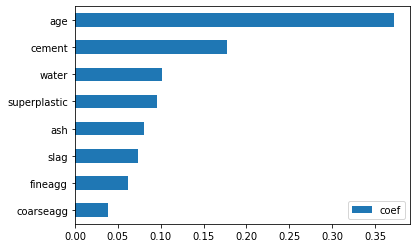

In [231]:
chart.plot(kind='barh', label='Importance');
plt.legend(loc='lower right');

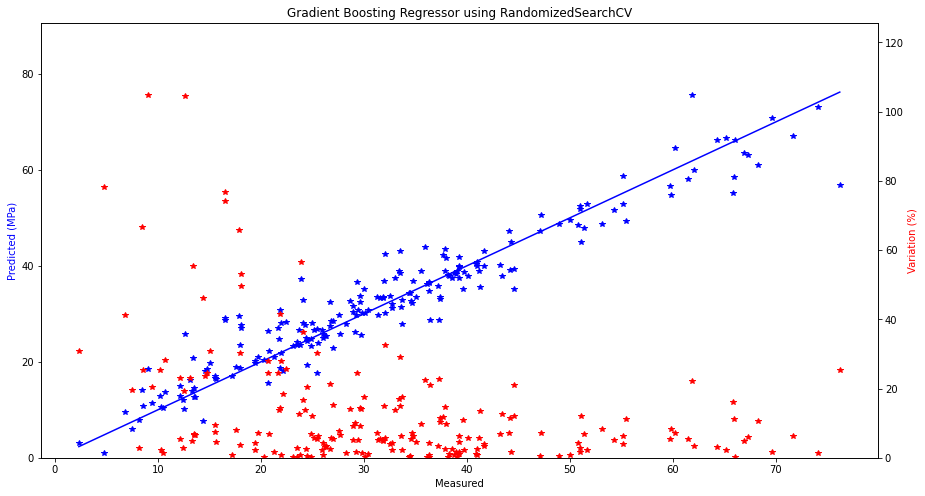

In [232]:
# Comparing prediction vs actual values

x = gb_line["measured"]
y1 = gb_line["predicted"]
y2 = gb_line["Variation"]

s_min = y_test.min()
s_max = y_test.max()

fig, ax1 = plt.subplots(figsize=(15,8))

ax2 = ax1.twinx()
ax1.plot(x, y1, 'b*')
ax2.plot(x, y2, 'r*')

ax1.plot([s_min,s_max],[s_min,s_max], color='blue'); # Strength range values

ax1.set_title("Gradient Boosting Regressor using RandomizedSearchCV")
ax1.set_xlabel('Measured')
ax1.set_ylabel('Predicted (MPa)', color='blue')
ax2.set_ylabel('Variation (%)', color='r')

max1 = gb_line["predicted"].max()*1.2
max2 = gb_line["Variation"].max()*1.2
#
ax1.set_ylim([0,max1])
ax2.set_ylim([0,max2])

plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


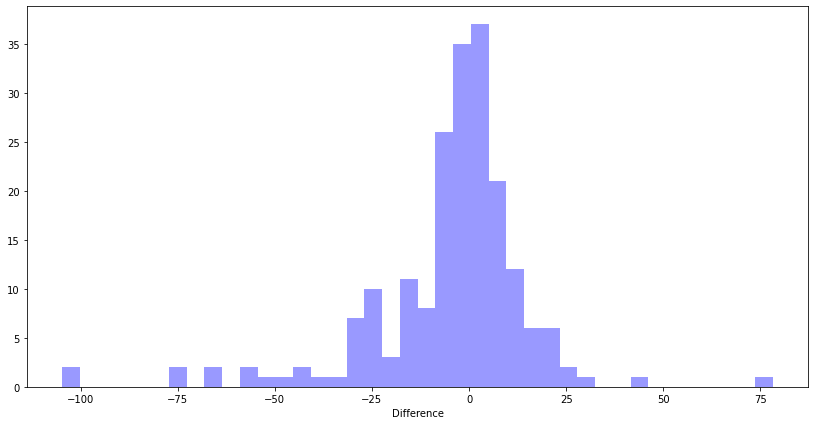

In [234]:
#gb_line["Variation"].plot(kind='hist')
sns.distplot(gb_line["Difference"],kde=False,color='blue',bins=40)
fig = plt.gcf()
fig.set_size_inches( 14, 7)
#plt.xlim(-100, 100)

In [235]:
gb_line["Difference"].describe()

count    201.000000
mean      -5.211407
std       21.077488
min     -104.657619
25%       -9.362324
50%       -1.076344
75%        4.870317
max       78.153519
Name: Difference, dtype: float64

In [236]:
from sklearn.metrics import mean_absolute_error
SK_MAE = round(mean_absolute_error(y_test, y_pred2),3)
print('SK_MAE model :',SK_MAE)

SK_MAE model : 3.17


In [237]:
from sklearn.metrics import mean_squared_error
SK_RMSE = round(mean_squared_error(y_test, y_pred2, squared=False),3) # squared=True returns only MSE
print('SK_RMSE final model :',SK_RMSE)

SK_RMSE final model : 4.516


# 5.- Conclusion

1.- Data Analysis - Linear regression, REDGI, LASSO, and ElasticNet models were used with the following data:
                
    1.1.- Age is the stronger driver in the data. 
    
    1.2.- Ash, Slag and Superplastic has the small percent of contribution in the mixture.
    
    1.3.- Polynomial regression shows a higer score 0.765 when comparing with linear regression 0.596
    
    1.4.- Linear regression shows a better score when comparing with the Shrinkage methods

In [238]:
Summary2

,Method,Train_Score,Test_Score,RMSE,MAE,Train_Score_Poly,Test_Score_Poly,RMSE_Poly,MAE_Poly
0,Liniar Regression,0.6028,0.5955,10.147,8.084,0.7649,0.6805,9.018,7.056
1,RIDGE,0.6028,0.5956,10.146,8.086,0.7649,0.6804,9.019,7.058
2,LASSO,0.6008,0.5961,10.140,8.151,0.7573,0.6769,9.069,7.092
3,ElasticNet,0.5983,0.5930,10.179,8.213,0.7541,0.6740,9.109,7.187


2.- CroosValidation - Different models

    2.1.- Linear regression
            
    2.2.- Bagging Regressor
            
    2.3.- GradientBoostingRegressor
            
    2.4.- XGBoostingRegressor (Best model)
            
    2.5.-LGBM regressor
        
    XGBoostingRegressor shows the highest Score 

In [239]:
Summary3

,Method,Score,SD
0,Linear Regression,59.002907,6.461786
1,Linear Regression_Log,80.621610,2.423262
2,Bagging,89.744934,2.210098
3,Gradient Boosting,90.182673,2.111902
4,Random Forest,91.214603,2.014279
5,XGBoosting,93.476359,2.184150
6,LGBM,92.789579,2.095430


3.- Tuning - Using GridSearchCV and RandomizedSearchCV
    
    3.1.- RandomizedSearchCV gives a faster result and slithly lower than GridSearchCV which took longer time than expected 
        
    3.2.- GradientBoostingRegressor and XGBoostingRegressor gave pretty similar results
        
    Observation: Charts showed were using XGBoostingRegressor (Data was splitted in train, validate and test sets)


In [240]:
Summary4

,Method,Train_Score,Validate_Score,Test_Score
0,GradientBoosting GridSearchCV,0.9877,0.9208,0.9126
1,GradientBoosting RandomizedSearchCV,0.9573,0.9234,0.9134
2,XGBoost RandomizedSearchCV,0.9733,0.9282,0.9154
